Autor: Gustavo Vilela Mitraud </b>
Universidade Presbiteriana Mackenzie


In [1]:
import pandas as pd
import numpy as np

df_steam = pd.read_csv("archive/steam.csv")
df_steam.head()

appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat enabled  Action   
3  Multi-player;Online Multi-Player;Local Multi-P...  Action   
4  Single-player;Multi-player;Valve Anti-Cheat en...  Action   

                  steamspy_tags  achievements  positive_ratings  \
0        Action;FPS;Multiplayer             0            124534   
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   

   price  
0   7.19  
1   3.99  
2   3.99  
3   3.99  
4   3.99

Vamos criar flags para cada tag, ou seja, cada jogo tera um vetor cujas celulas tem um valor binario indicando se tal jogo tem ou não uma certa tag

In [2]:
def createFlagDict(df):
    flags = df

    for i in range(len(flags)):
        flags[i] = flags[i].split(";")
    flags = sum(flags, [])

    unique_flags = np.unique(flags)

    games_flag_dict = dict()

    for game in df_steam["appid"]:
        games_flag_dict[game] = []

    for i, game in enumerate(games_flag_dict.keys()):
        for tag in unique_flags:
            if tag in df.iloc[i]:
                games_flag_dict[game].append(1)
            else:
                games_flag_dict[game].append(0)

    return games_flag_dict

games_tag_dict = createFlagDict(df_steam["steamspy_tags"])

/tmp/ipykernel_2147/3148240163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flags[i] = flags[i].split(";")
/tmp/ipykernel_2147/3148240163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flags[i] = flags[i].split(";")
/tmp/ipykernel_2147/3148240163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flags[i] = flags[i].split(";")
/tmp/ipykernel_2147/3148240163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a co

In [3]:
game_tag_data = pd.DataFrame(games_tag_dict)
game_tag_data = game_tag_data.transpose()
game_tag_data

0    1    2    3    4    5    6    7    8    9    ...  329  330  331  \
10         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
20         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
30         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
40         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
50         0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1065230    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1065570    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1065650    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1066700    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
1069460    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   

         332  333  334  335  336  337  338  
10         0    0    0    0    0    0    0  
20         0    0    0    0    0    0    0  
30         0    0    0    1    0    0    0  
40         0    0    0    0    0    0    0  
50         0    0    0    0    0    0    0  
...      ...  ...  ...  ...  ...  ...  ...  
1065230    0    0    0    0    0    0    0  
1065570    0    0    0    0    0    0    0  
1065650    0    0    0    0    0    0    0  
1066700    0    0    0    0    0    0    0  
1069460    0    0    0    0    0    0    0  

[27075 rows x 339 columns]

Calculando o numero ideal de clusters usando o metodo do cotovelo

In [4]:
from sklearn.cluster import KMeans

wcss = []

for cluster_num in range(2, 21):
    kmeans_test = KMeans(n_clusters=cluster_num)
    kmeans_test.fit(game_tag_data)
    wcss.append(kmeans_test.inertia_)

/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/gustavovm/.loc

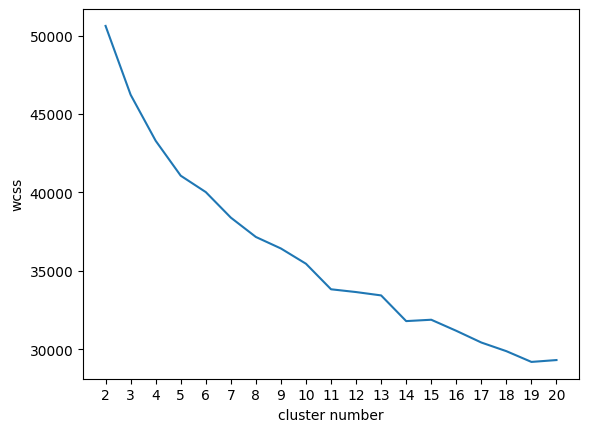

In [10]:
from matplotlib import pyplot as plt

plt.ylabel("wcss")
plt.xlabel("cluster number")
plt.xticks(range(2,21))
plt.plot(range(2,21), wcss)

aplicando um algoritmo de k means na base

In [11]:

clusters = KMeans(n_clusters=8).fit_predict(game_tag_data)
clusters

/home/gustavovm/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 5, 7, ..., 1, 2, 2], dtype=int32)

agora vamos testar o modelo

In [12]:
lookup_recomendation = {"game_name": [x.lower() for x in df_steam["name"]], "cluster": clusters}

from sklearn.neighbors import NearestNeighbors
def get_games_incluster(game):
    cluster_to_recomend = int(lookup_recomendation.loc[lookup_recomendation["game_name"]==game]["cluster"])
    list_of_games = list(lookup_recomendation.loc[lookup_recomendation["cluster"]==cluster_to_recomend]["game_name"])
    return list_of_games

neighbours = NearestNeighbors(n_neighbors=5)
neighbours.fit(game_tag_data)

def get_recomendation_knn(game):
    index = df_steam.index[df_steam["name"]==game][0]
    neighbours_indexes = neighbours.kneighbors(np.array(game_tag_data.iloc[index]).reshape(1,-1))[1][0]
    return df_steam.iloc[neighbours_indexes]

get_recomendation_knn("Counter-Strike: Global Offensive")

appid                              name release_date  english  \
25         730  Counter-Strike: Global Offensive   2012-08-21        1   
60        2450                  Bloody Good Time   2010-10-29        1   
26233  1008870                     Excive A-1000   2019-04-18        1   
146       4920               Natural Selection 2   2012-10-30        1   
1           20             Team Fortress Classic   1999-04-01        1   

                             developer                     publisher  \
25     Valve;Hidden Path Entertainment                         Valve   
60                     Outerlight Ltd.                       Ubisoft   
26233                Droid Riot;Mahich                    Droid Riot   
146       Unknown Worlds Entertainment  Unknown Worlds Entertainment   
1                                Valve                         Valve   

               platforms  required_age  \
25     windows;mac;linux             0   
60               windows             0   
26233            windows             0   
146        windows;linux             0   
1      windows;mac;linux             0   

                                              categories  \
25     Multi-player;Steam Achievements;Full controlle...   
60         Single-player;Multi-player;Steam Achievements   
26233                                      Single-player   
146    Multi-player;Online Multi-Player;Steam Achieve...   
1      Multi-player;Online Multi-Player;Local Multi-P...   

                      genres                 steamspy_tags  achievements  \
25       Action;Free to Play   [FPS, Multiplayer, Shooter]           167   
60                    Action    [Action, Multiplayer, FPS]            12   
26233                 Action        [Action, FPS, Shooter]             0   
146    Action;Indie;Strategy  [Multiplayer, Strategy, FPS]            67   
1                     Action    [Action, FPS, Multiplayer]             0   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
25              2644404            402313             22494             6502   
60                  662               204               193              193   
26233                 9                 1                 0                0   
146                8372              1498               627              253   
1                  3318               633               277               62   

                   owners  price  
25     50000000-100000000   0.00  
60          100000-200000   4.29  
26233             0-20000   4.79  
146       1000000-2000000   6.99  
1        5000000-10000000   3.99